In [1]:
from importlib import import_module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn_evaluation import plot

from sklearn_evaluation import plot

In [20]:
# PARAMETERS
model = 'sklearn.linear_model.LogisticRegression'
upstream = None
n_samples = 1000

In [28]:
X, y = make_classification(n_samples=n_samples,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [29]:
module, _, name = model.rpartition('.')
model_class = getattr(import_module(module), name)

In [40]:
if 'svm' in model:
    kwargs = dict(max_iter=10000)
else:
    kwargs = dict()

In [36]:
model_ = model_class(**kwargs)
model_.fit(X_train, y_train)

LinearSVC(max_iter=10000)

In [37]:
method = ('predict_proba' if hasattr(model_, 'predict_proba')
          else 'decision_function')

probas = getattr(model_, method)(X_test)

In [38]:
df = pd.DataFrame({'prob': probas if len(probas.shape) == 1 else probas[:, 1],
                   'y_true': y_test})
df.to_parquet('output.parquet')

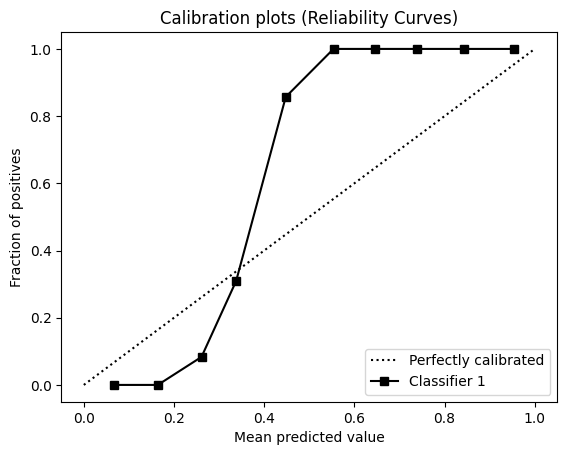

In [39]:
_ = plot.calibration_curve(df.y_true, [df.prob])